# How to Create a Multi-class Image Classifier
> This tutorial show you how to build an image classfier to detect more than two classes. The we built is quite limited. It can only tell you whether an image is a Labrador or a Golden Retriever. In this tutorial we will build a classifier that can detect 37 pet breed classes. 

## Collect Data

We can download the pet breeds dataset using fastai

In [ ]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.PETS)
path

Path('/Users/jerryyu/.fastai/data/oxford-iiit-pet')

The dataset was downlaoded to a folder named oxford-iiit-pet. Let's see how this dataset is structured. 
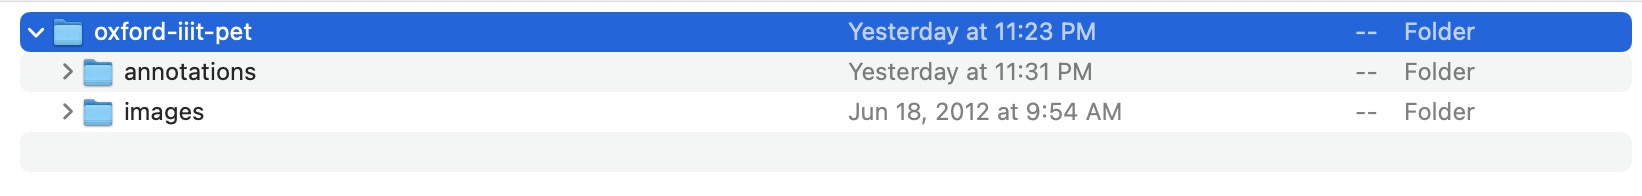

Our data (images) is stored in the images folder. We need to change our path to point to our data. The annotations folder contains more infomation of this dataset but we won't be using it in this tutorial.

In [ ]:
path = path / 'images'
path

Path('/Users/jerryyu/.fastai/data/oxford-iiit-pet/images')

## Train Our Model

Now our path is correct, we can construct our dataloaders.

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
    item_tfms = Resize(460),
    batch_tfms = aug_transforms(size=224, min_scale=0.75)
).dataloaders(path, bs=32)

The blocks arguments tell fastai what input our model needs and what output our model will produce. Here our model will accept images as input and will produce a categorical output. get_items tells how to find our data. We use the get_image_file method to get all the file paths. get_y tells how to get the label from our file path. We grab the class name from the file name. Then we apply item transform and batch transform to our data before feed it ot our model. Let's see a few images from our dataset. 

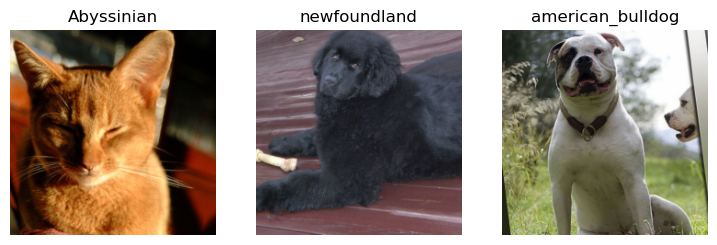

In [ ]:
dls.show_batch(max_n=3)

Now our data is ready, we can build a learner to train our model. 

In [ ]:
learner = vision_learner(dls, resnet34, metrics=error_rate)
learner.fine_tune(2)

/Users/jerryyu/opt/anaconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/Users/jerryyu/opt/anaconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.063441,0.328220,0.113667,19:54


epoch,train_loss,valid_loss,error_rate,time
0,0.590826,0.358716,0.109608,24:31
1,0.318244,0.248668,0.077131,25:47


The result looks pretty good. Let's take a look at the confusion matrix

In [ ]:
interp = ClassificationInterpretation.from_learner(learner)

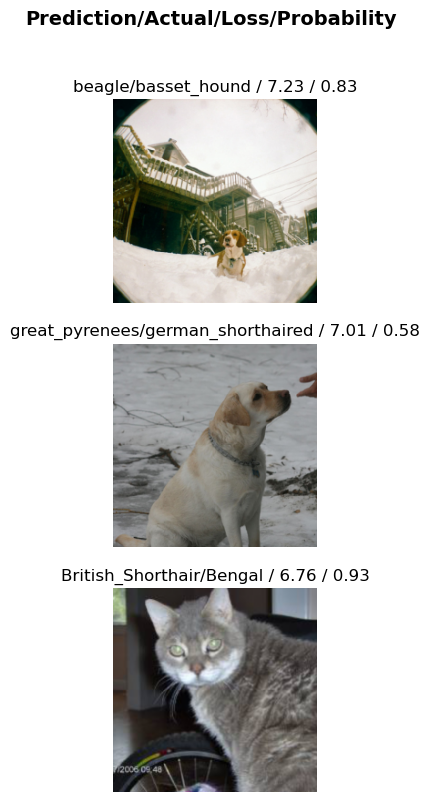

In [ ]:
interp.plot_top_losses(3, nrows=3)

## Host Our Model

Let's export the model and host it on Hugging Face. The tutorial talks about hosting model on Hugging Face so I won't repeat here. 

In [ ]:
learner.export('model.pkl')